In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install pandas-profiling

     -------------------------------------- 325.0/325.0 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 8.4 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 14.6 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 13.8 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 8.9 MB/s eta 0:00:00
     ----------------------

  DEPRECATION: htmlmin is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport
import missingno as msno

In [2]:
df = pd.read_csv("census_07_2022.csv") #loading and reading the dataset
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7768,7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian
7769,7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,None,NaN
7770,7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None
7771,7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian


In [3]:
# drop the Unnamed column
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
# Performing descriptive statistics
df.describe(include = "all").T

,count,unique,top,freq
House Number,7773,222,1,301
Street,7773,105,Wong Light,701
First Name,7773,366,James,36
Surname,7773,630,Smith,225
Age,7773,110,43,146
Relationship to Head of House,7773,21,Head,2912
Marital Status,5960,9,Single,2660
Gender,7773,9,Female,3889
Occupation,7773,1086,Student,1477
Infirmity,7773,8,None,7721


In [5]:
#To profile a dataframe
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print(df.info()) #checking the data types
#The result tells us there are 7773 rows and 11 columns:
#RangeIndex: 7773 entries, 0 to 7772 with null values in Marital Status and Religion
#Data columns (total 11 columns):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   object
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   object
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: object(11)
memory usage: 668.1+ KB
None


In [7]:
df.isnull().sum() #checking the total missing values

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1813
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1863
dtype: int64

<AxesSubplot: >

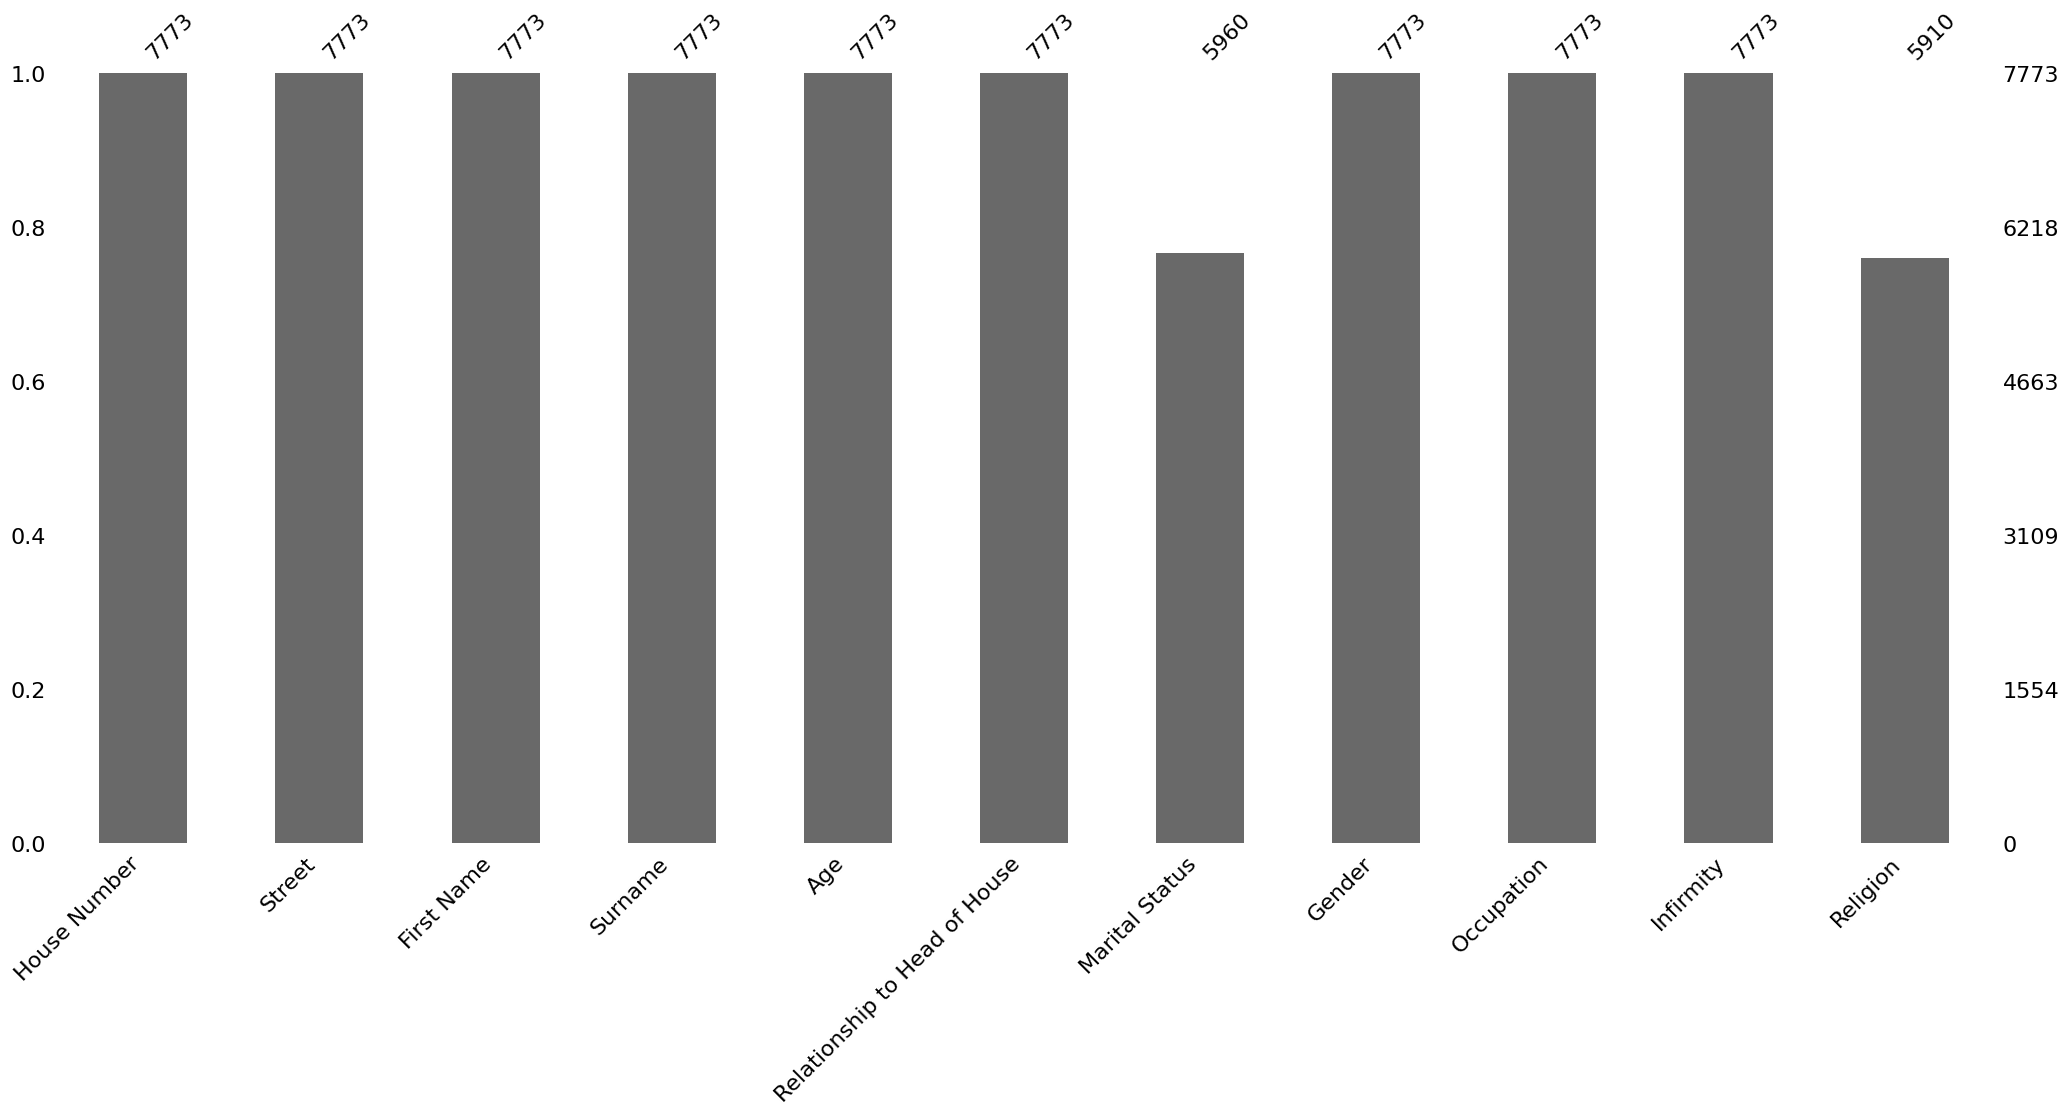

In [8]:
# Gives a bar chart of the missing values
msno.bar(df)

In [9]:
 #get the number of missing data points per column
missing_values_count = df.isnull().sum()

In [10]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.299264353297545


In [11]:
# Display the categories in the categorical column
#cols = ["Relationship to Head of House", "Marital Status", "Gender", "Occupation", "Infirmity",
      # "Religion"]

#for col in cols:
   # print(df[col].value_counts())
   # print("-" * 50)

# House Number

In [12]:
#checking number of unique values in the House Number column
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', 'One', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [13]:
#using .replace to change all str to int in the age column
#also replacing '' with a 6
df['House Number'].replace('One', 1, inplace=True)

In [14]:
df['House Number'] = df['House Number'].astype(int) #.astype changes the age column that is in str to int

In [15]:
#check to see that the column has been changed to int and all str values  have been replaced
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Age

In [16]:
#df['Age'].value_counts()

In [17]:
#checking number of unique values in the Age column
df['Age'].unique()

array(['56', '57', '15', '44', '9', '72', '38', '5', '3', '41', '13',
       '73', '45', '36', '51', '23', '33', '4', '0', '30', '6', '2', '21',
       '28', '27', '83', '85', '19', '40', '16', '89', '65', '47', '20',
       '68', '66', '37', '32', '14', '10', '86', '69', '58', '22', '59',
       '63', '46', '39', '53', '42', '12', '8', '1', '24', '50', '26',
       '70', '54', '43', '60', '18', '11', '29', '76', '64', '34', '52',
       '35', '7', '48', '25', '75', '79', '71', '17', '49', '55', '74',
       '78', '31', '62', '67', '61', '72.38784457', '74.38784457', '84',
       '88', '80', '77', '81', '87', '101', '104', '82', '91', '102',
       '97', '90', '96', '98', '93', '103', '80.57582061', '77.57582061',
       '7.11E-15', '92', '105', '94', ' ', '99'], dtype=object)

In [18]:
#using .replace to change all float to int in the age column
#also replacing '' with a 6
df['Age'].replace('72.38784457', 72, inplace=True)
df['Age'].replace('74.38784457', 74, inplace=True)
df['Age'].replace('80.57582061', 81, inplace=True)
df['Age'].replace('77.57582061', 78, inplace=True)
df['Age'].replace('7.11E-15', 7, inplace=True)
df['Age'].replace(' ', 6, inplace=True)

In [19]:
df['Age'] = df['Age'].astype(int) #.astype changes the age column that is in str to int

In [20]:
#check to see that the Age column has been changed to int and all null values and float have been replaced
df['Age'].unique()

array([ 56,  57,  15,  44,   9,  72,  38,   5,   3,  41,  13,  73,  45,
        36,  51,  23,  33,   4,   0,  30,   6,   2,  21,  28,  27,  83,
        85,  19,  40,  16,  89,  65,  47,  20,  68,  66,  37,  32,  14,
        10,  86,  69,  58,  22,  59,  63,  46,  39,  53,  42,  12,   8,
         1,  24,  50,  26,  70,  54,  43,  60,  18,  11,  29,  76,  64,
        34,  52,  35,   7,  48,  25,  75,  79,  71,  17,  49,  55,  74,
        78,  31,  62,  67,  61,  84,  88,  80,  77,  81,  87, 101, 104,
        82,  91, 102,  97,  90,  96,  98,  93, 103,  92, 105,  94,  99])

<AxesSubplot: >

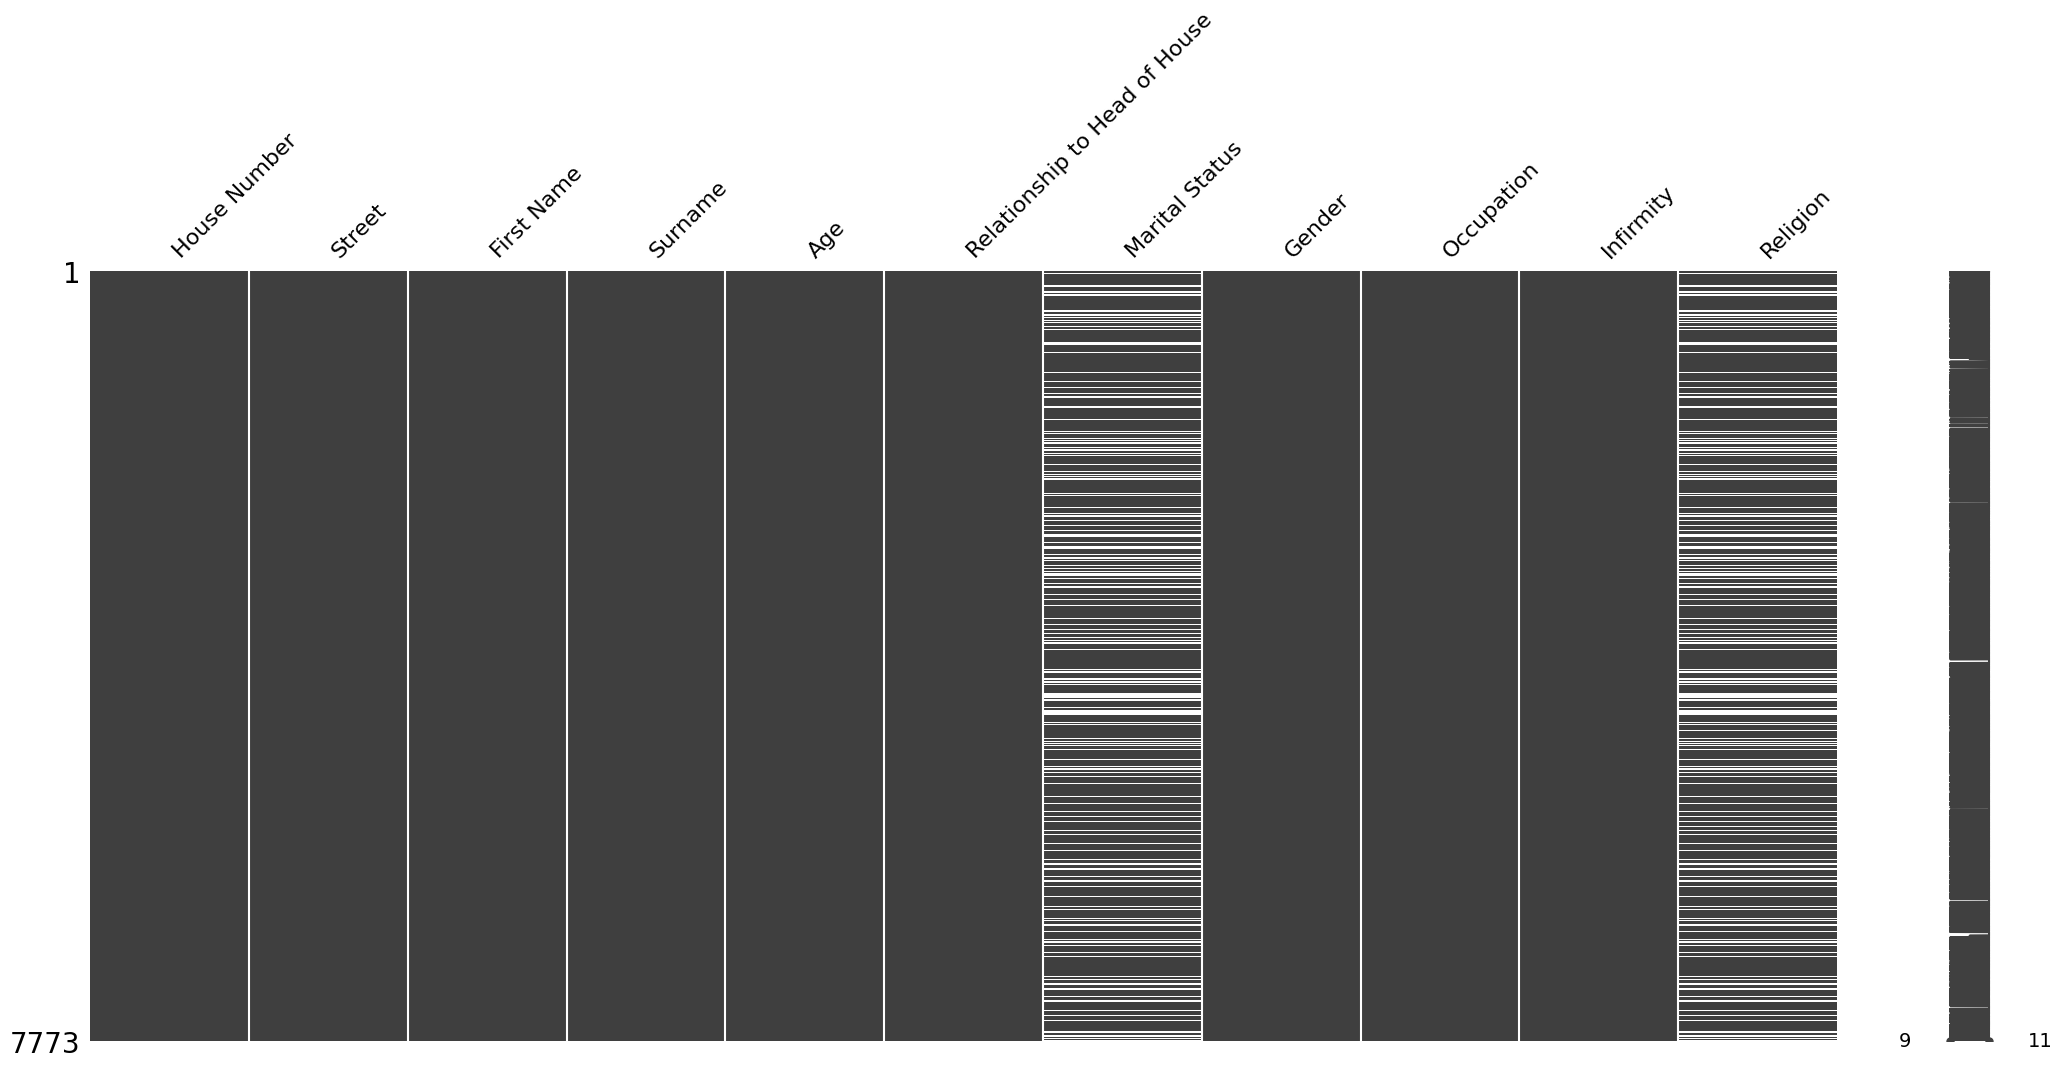

In [21]:
# a graphical representation of  information of the missing values
msno.matrix(df)

In [22]:
df["Age"].describe()

count    7773.000000
mean       36.503281
std        21.835484
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

In [53]:
#checking the age of minors less than 18
df[df['Age'] < 18 ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
2,1,Forgotten Gardens,Nicole,White,15,Daughter,Single,Female,Student,None,None,10-14
4,2,Forgotten Gardens,Jeffrey,John,9,Son,Single,Male,Student,None,None,5-9
7,4,Forgotten Gardens,Gerard,Mills,5,Son,Single,Male,Student,None,None,0-4
8,4,Forgotten Gardens,Anna,Mills,5,Daughter,Single,Female,Student,None,None,0-4
9,4,Forgotten Gardens,Leslie,Jones,3,Son,Single,Male,Child,None,None,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1,Matthews Rectory,Hollie,Martin,3,Daughter,Single,Female,Child,None,None,0-4
7748,1,Matthews Rectory,Patrick,Martin,0,Son,Single,Male,Child,None,None,0-4
7766,1,Adams Cottage,Tracey,Singh,8,Daughter,Single,Female,Student,None,None,5-9
7767,1,Adams Cottage,Abdul,Singh,8,Son,Single,Male,Student,None,None,5-9


# Gender

In [23]:
#checking number of unique values in the Gender column
df['Gender'].unique()

array(['Female', 'Male', 'female', 'M', 'm', 'f', 'F', 'male', ' '],
      dtype=object)

In [24]:
df['Gender'].replace('female', 'Female', inplace=True)
df['Gender'].replace('f', 'Female', inplace=True)
df['Gender'].replace('F', 'Female', inplace=True)
df['Gender'].replace('male', 'Male', inplace=True)
df['Gender'].replace('m', 'Male', inplace=True)
df['Gender'].replace('M', 'Male', inplace=True)
df['Gender'].replace(' ', 'Male', inplace=True)

In [25]:
#check to see that all genders are the same and only contain Male and Female
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
# total sum of gender 
df["Gender"].value_counts()

Female    4016
Male      3757
Name: Gender, dtype: int64

# Occupation

In [27]:
df["Occupation"].unique()

array(['Unemployed', 'Education officer, community', 'Student', ...,
       'Retired Civil Service administrator',
       'Retired Research officer, government',
       'Retired Consulting civil engineer'], dtype=object)

In [28]:
df["Occupation"].value_counts().sort_values()

Retired Consulting civil engineer         1
Retired Dramatherapist                    1
Retired Conservator, museum/gallery       1
Retired Media buyer                       1
Retired Building services engineer        1
                                       ... 
PhD Student                              14
Child                                   433
Unemployed                              481
University Student                      488
Student                                1477
Name: Occupation, Length: 1086, dtype: int64

# Marital Status

In [29]:
#checking number of unique values in the Marital Status column
df['Marital Status'].unique()

array(['Married', nan, 'Divorced', 'Widowed', 'Single', 'M', 'D', ' ',
       'S', 'W'], dtype=object)

In [30]:
#replacing and grouping the marital status
df['Marital Status'].replace('M', 'Married', inplace=True)
df['Marital Status'].replace('D', 'Divorced', inplace=True)
df['Marital Status'].replace('S', 'Single', inplace=True)
df['Marital Status'].replace('W', 'Widowed', inplace=True)
df['Marital Status'].replace(' ', 'Single', inplace=True)

# replace the missing values in Marital Status with "single"
df["Marital Status"].replace(np.nan, "Single", inplace = True)

In [31]:
#checking to see if the changes has been effected
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [32]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1863
dtype: int64

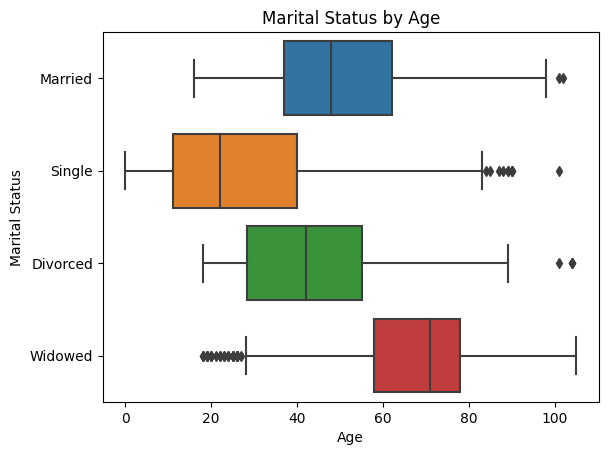

In [33]:
#Showing the marital status by age with a boxplot
sns.boxplot(x = 'Age', y ='Marital Status', data = df)
plt.title('Marital Status by Age')
plt.show()

# Religion

In [34]:
df['Religion'].unique()

array(['Christian', nan, 'None', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       ' ', 'Orthodoxy'], dtype=object)

In [35]:
df['Religion'].replace(' ', 'None', inplace=True)
# replace the missing values  with "none"
df["Religion"].replace(np.nan, 'None', inplace = True)

In [36]:
df['Religion'].unique()

array(['Christian', 'None', 'Catholic', 'Methodist', 'Muslim', 'Jewish',
       'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       'Orthodoxy'], dtype=object)

In [37]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# Relationship to Head of House

In [38]:
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'None', 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter', ' '],
      dtype=object)

In [39]:
df['Relationship to Head of House'].replace(' ', 'None', inplace = True)

In [40]:
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'None', 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter'],
      dtype=object)

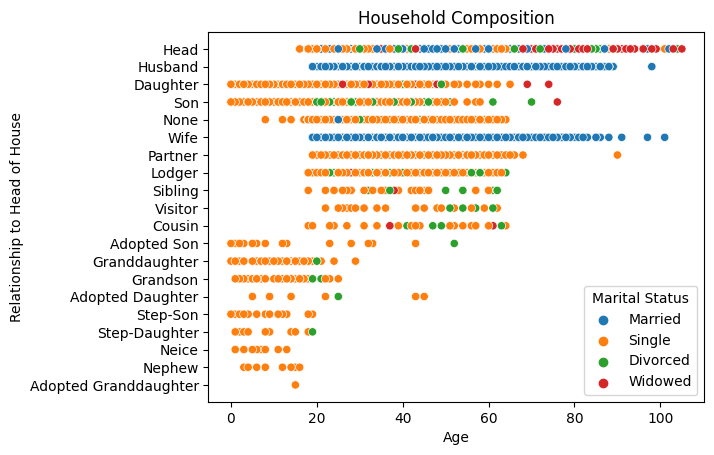

In [41]:
sns.scatterplot(data = df, x = 'Age', y = 'Relationship to Head of House', hue = "Marital Status")
plt.title("Household Composition"); #Age against Relationship to the head of the house conditioned by Marital status


# First Name and Surname

In [42]:
df['First Name'].unique()

array(['Laura', 'Elliot', 'Nicole', 'Michelle', 'Jeffrey', 'Emily',
       'Harry', 'Gerard', 'Anna', 'Leslie', 'Molly', 'Rhys', 'Kim',
       'Samantha', 'Rebecca', 'Charles', 'Chelsea', 'Derek', 'Kate',
       'Colin', 'Catherine', 'Anne', 'Hollie', 'Ellie', 'Danielle',
       'Maureen', 'Karl', 'Leon', 'Lydia', 'Sophie', 'Stanley', 'Sandra',
       'Bradley', 'Jasmine', 'Tom', 'Owen', 'Josephine', 'Arthur',
       'Melanie', 'Samuel', 'Joanne', 'Amber', 'Teresa', 'Jenna', 'Frank',
       'Neil', 'Nicola', 'Hayley', 'Dorothy', 'Ann', 'Marie', 'Janice',
       'Dylan', 'Angela', 'Rachael', 'Bernard', 'Gregory', 'Mohamed',
       'Vanessa', 'Irene', 'Geraldine', 'Iain', 'Helen', 'Lawrence',
       'Connor', 'Lesley', 'Douglas', 'Reece', 'Glen', 'Abbie', 'Aimee',
       'Sarah', 'Kathryn', 'Jason', 'Joshua', 'Craig', 'Rosie', 'Clive',
       'Amelia', 'Denis', 'Dawn', 'Marc', 'Stephanie', 'Marilyn', 'Mary',
       'Richard', 'Lucy', 'Donna', 'Justin', 'Jade', 'Georgia', 'Glenn',
       

In [43]:
df['First Name'].replace(' ', 'None', inplace = True)

In [44]:
df['Surname'].unique()

array(['White', 'John', 'Henderson', 'Mills', 'Jones', 'Conway', 'Lewis',
       'Walsh-Lewis', 'Hughes', 'Wells', 'Cox', 'Fletcher-Cox',
       'Robinson', 'Green', 'Ward', 'Pritchard', 'Knowles', 'Burke',
       'Bennett', 'Morgan', 'Rogers', 'Wilson', 'Knight', 'Smith',
       'Poole-Smith', 'Pearce', 'Stevens', 'Edwards', 'Saunders',
       'Holmes', 'Davies', 'Elliott', 'Evans', 'Thomas', 'Davis',
       'Chapman-Davis', 'Brown', 'Ford', 'Dunn', 'Taylor', 'Heath',
       'Wilkins', 'Lord', 'Begum', 'Johnson', 'Stone', 'Fleming',
       'Miller', 'Long', 'Palmer', 'Wood', 'Storey', 'Marsh', 'Powell',
       'Gill', 'Norris', 'Chapman', 'Talbot', 'McCarthy',
       'Simpson-Knight', 'Clarke', 'Cooke', 'Williamson', 'Fowler',
       'Kelly', 'Ali', 'Walker', 'Gough-Jones', 'Thompson-Gough-Jones',
       'Russell', 'Short', 'Leonard', 'Dyer', 'Noble', 'Hill', 'Moore',
       'Butler', 'Goodwin', 'Doherty', 'Stokes', 'Hilton', 'Harris',
       'Williams', "O'Brien", 'Lee', 'Price-Davis

# Street

In [45]:
df['Street'].unique()

array(['Forgotten Gardens', 'Quayside Drive', 'Fish Harbor',
       'Matthews River', 'Butcher Burgs', 'Oaktree Road', 'Thomas Brook',
       'Newfound Drive', 'Wade Manors', 'Newfound Creek',
       'Aprildraw Avenue', 'Beechpush Lane', 'Pillar Avenue',
       'Springban Street', 'Donnelly Cliffs', 'Pratt Via',
       'Higgins Burgs', 'Murray Road', 'Kraken Road', 'Guardian Mews',
       'Webster Street', 'Nicholson Road', 'Repton Lane',
       'Barbican Prairie', 'Wakefieldthorpe Street', 'Chester Street',
       'Sinclair Passage', 'Palmtree Haven', 'Stirling Avenue',
       'Iron Track', 'Norwich Cliffs', 'Portsmouthcurl Road',
       'Forgottencrib Lane', 'Joyce Mill', 'Briggs Avenue',
       'Aquarius Lane', 'Chapman Landing', 'Wong Light',
       'Robinson Bridge', 'Estuary Drive', 'Khan Valley',
       'Wolverhampton Avenue', 'March Views', 'Lucas Groves',
       'Gold Street', 'Copper Loaf', 'Metropolis Alley',
       'Jenkins Extensions', 'Palmer Track', 'Laurel Road',
      

# INFIRMITY

In [46]:
df['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Blind', 'Disabled', ' ',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [47]:
#replacing the blank column with None
df['Infirmity'].replace(' ', 'None', inplace = True)

In [48]:
df['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Blind', 'Disabled',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [57]:
#a re-check to see if the data has been properly cleaned and all null values have been filled accordingly
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7773 non-null   int32   
 1   Street                         7773 non-null   object  
 2   First Name                     7773 non-null   object  
 3   Surname                        7773 non-null   object  
 4   Age                            7773 non-null   int32   
 5   Relationship to Head of House  7773 non-null   object  
 6   Marital Status                 7773 non-null   object  
 7   Gender                         7773 non-null   object  
 8   Occupation                     7773 non-null   object  
 9   Infirmity                      7773 non-null   object  
 10  Religion                       7773 non-null   object  
 11  Age Range                      7773 non-null   category
dtypes: category(1), int32(2), object(9

# AGE PYRAMID

In [61]:
# The code used to create age and bins in the cell was gotten from
#(https://dfrieds.com/data-analysis/bin-values-python-pandas.html) it was adopted to fit this exercise

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]

order_class = ['95+', '90-95', '85-89', '75-79', '70-74', '65-69','60-64', '55-59', '50-54','45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-95', '96-100', '101-105','106-110']

df['Age Range'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True, ordered = False)

In [62]:
#this would group the data by age and gender
grouped_data = df.groupby(['Age Range', 'Gender']).size().reset_index(name='Population')

In [63]:
#This will create two different tables of male and female population, in order to perform an outer join later
female_table = grouped_data [grouped_data['Gender'] == 'Female']
male_table = grouped_data [grouped_data['Gender'] == 'Male']
female_table.columns = ['Age Range', 'Gender', 'Female Population']
male_table.columns = ['Age Range', 'Gender', 'Male Population']

In [64]:
Pyramid_table = pd.merge(female_table, male_table, on='Age Range', how='outer')

In [65]:
Pyramid_table

,Age Range,Gender_x,Female Population,Gender_y,Male Population
0,0-4,Female,238,Male,289
1,5-9,Female,291,Male,253
2,10-14,Female,210,Male,316
3,15-19,Female,298,Male,284
4,20-24,Female,271,Male,285
5,25-29,Female,289,Male,248
6,30-34,Female,322,Male,266
7,35-39,Female,373,Male,285
8,40-44,Female,327,Male,296
9,45-49,Female,298,Male,234


In [66]:
pyramid_table = Pyramid_table.drop(['Gender_x', 'Gender_y'], axis = 1)

In [67]:
pyramid_table['Total Population'] = pyramid_table['Male Population'] + pyramid_table['Female Population']

In [68]:
#To create a mirror
pyramid_table['Male Population'] = - (pyramid_table['Male Population'])

In [69]:
pyramid_table

,Age Range,Female Population,Male Population,Total Population
0,0-4,238,-289,527
1,5-9,291,-253,544
2,10-14,210,-316,526
3,15-19,298,-284,582
4,20-24,271,-285,556
5,25-29,289,-248,537
6,30-34,322,-266,588
7,35-39,373,-285,658
8,40-44,327,-296,623
9,45-49,298,-234,532


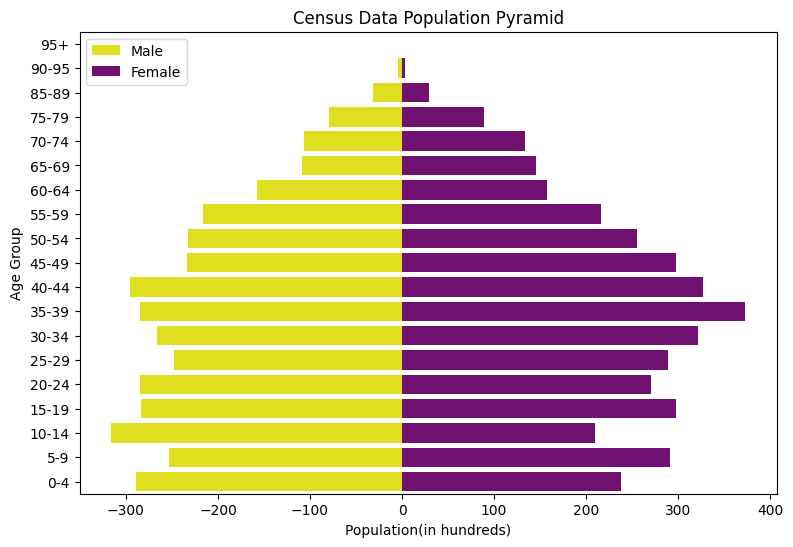

In [72]:
plt.figure(figsize=(9,6))
age_pyramid = sns.barplot(x='Male Population', y = 'Age Range', data = pyramid_table, color=('yellow'), label='Male', order = order_class )
age_pyramid =sns.barplot(x='Female Population', y = 'Age Range', data = pyramid_table, color=('purple'), label='Female', order = order_class )
age_pyramid.set_title('Census Data Population Pyramid')
age_pyramid.set_xlabel('Population(in hundreds)')
age_pyramid.set_ylabel('Age Group')
age_pyramid.legend()


# Age Pyramid

In [74]:
#calculating age pyramid we have the below
AgeRange = [ ((i-1)*5 ,  (i-1)*5 + 4)  for i in range(1,21)] + [(100, 130)]
print (AgeRange)

MaleCount = []
FemaleCount = []
for pp in AgeRange:
    dfA = df[df['Age'] <= pp[1]] 
    dfB = dfA[dfA['Age'] >= pp[0] ]
    MaleCount.append(len(dfB[dfB['Gender'] == 'Male']))
    FemaleCount.append(len(dfB[dfB['Gender'] == 'Female']))


MaleCount = [(-1)*x for x in MaleCount]
print (MaleCount)
print (FemaleCount)


[(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 130)]
[-235, -262, -302, -286, -278, -264, -262, -285, -295, -252, -227, -215, -181, -108, -109, -86, -56, -38, -7, -5, -4]
[196, 267, 233, 280, 279, 287, 291, 381, 333, 323, 251, 217, 175, 146, 144, 96, 67, 35, 5, 5, 5]


Text(0.5, 1.0, 'Age Pyramid')

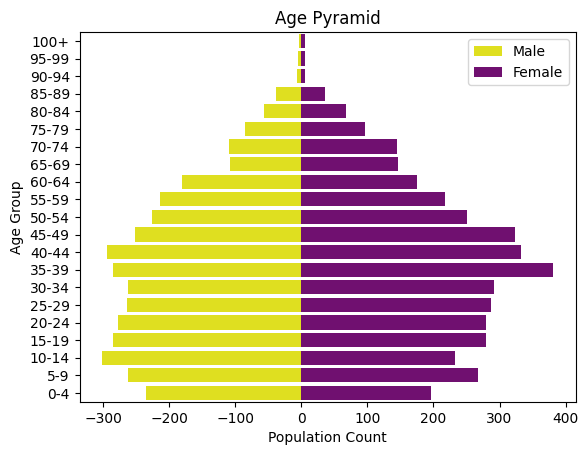

In [75]:
AgeClass= ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

AgeClass.reverse()
MaleCount.reverse()
FemaleCount.reverse()

age_p = pd.DataFrame({'Age': AgeClass,
 'Male': MaleCount,
 'Female': FemaleCount})



age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass,
color=('yellow'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass,
color=('purple'), label='Female')
age_pyramid.legend()
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.title('Age Pyramid')